
#**Análisis de Series Temporales de las Acciones de  de Apple (AAPL) y Microsoft (MSFT)**

##**Introducción**

El análisis de series temporales es una técnica fundamental utilizada para examinar patrones y comportamientos de datos a lo largo del tiempo. En este proyecto, nos enfocamos en analizar el comportamiento del precio de las acciones de dos importantes empresas tecnológicas: Apple (AAPL) y Microsoft (MSFT). El periodo de análisis abarca desde enero de 2024 hasta enero de 2025, con el objetivo de entender las fluctuaciones de los precios y las posibles tendencias en el mercado.

Durante este proceso, se utilizarán modelos estadísticos y herramientas de predicción para analizar el comportamiento futuro de las acciones. El estudio se enfocará en identificar tanto los cambios rápidos e impredecibles a corto plazo como las tendencias más duraderas y estables a largo plazo. Sin embargo, dado que el mercado de valores es naturalmente incierto, se debe considerar que cualquier predicción está sujeta a un grado de incertidumbre.

A través de este análisis, se espera obtener una comprensión más profunda de cómo las acciones de Apple y Microsoft pueden reaccionar ante diferentes eventos del mercado y cómo las tendencias pasadas pueden influir en los movimientos futuros, proporcionando información valiosa para los inversores y analistas financieros.

##**Hipótesis**

Los precios de las acciones de Apple (AAPL) y Microsoft (MSFT) podrían estar relacionados porque ambas compañías reaccionan de manera similar ante cambios en la economía y las tendencias del sector tecnológico.

##**Marco teórico**
**Definición de Serie Temporal**

Una serie temporal es una secuencia de observaciones numéricas recolectadas en momentos específicos y ordenados cronológicamente. Este tipo de datos refleja cómo una variable cambia a lo largo del tiempo. Por ejemplo, los precios diarios de una acción, la temperatura mensual de una ciudad o el número de ventas semanales de una empresa son todas series temporales.

**Objetivos del Análisis de Series Temporales**

El análisis de series temporales tiene como finalidad principal comprender el comportamiento dinámico de una variable a lo largo del tiempo para:

*   Describir patrones pasados y actuales (análisis descriptivo).
*   Modelar el comportamiento temporal de la variable.
*   Predecir valores futuros (forecasting).
*   Detección de patrones anómalos o cambios estructurales.
*   Evaluar relaciones causales con otras variables (en modelos multivariantes).

**Componentes de una Serie Temporal**

Toda serie temporal puede estar compuesta por varios elementos:

*   **Tendencia:** Cambio a largo plazo en el nivel medio de la serie. Puede ser ascendente, descendente o constante.
*   **Estacionalidad:** Fluctuaciones regulares que se repiten en intervalos fijos de tiempo (como los meses del año o los días de la semana).
*   **Ciclos:** Fluctuaciones que ocurren en periodos más largos y no necesariamente regulares, a menudo influenciadas por factores económicos o sociales.
*   **Ruido o Aleatoriedad:** Variaciones impredecibles y sin patrón definido. Representa los errores o la variabilidad no explicada por los otros componentes.

**Tipos de Series Temporales**

Las series temporales pueden clasificarse en dos grandes grupos:

*   **Determinísticas:** En las que los patrones siguen funciones predecibles (como senos, cosenos o polinomios).
*   **Estocásticas:** Tienen un componente aleatorio significativo y su comportamiento solo puede ser descrito probabilísticamente.

**Estacionariedad**

Una propiedad clave en el análisis de series temporales es la estacionariedad. Una serie se dice estacionaria si sus propiedades estadísticas (media, varianza y covarianza) no cambian con el tiempo.

*   **Estacionariedad fuerte:** Toda la distribución es constante en el tiempo
*   **Estacionariedad débil (o de segundo orden):** Solo la media y la varianza son constantes en el tiempo, y la covarianza depende solo del desfase (lag), no del tiempo específico.

Muchos modelos requieren que la serie sea estacionaria. Si no lo es, se aplican técnicas como diferenciación para transformarla.

**Métodos y Técnicas del Análisis de Series Temporales
Entre las principales técnicas utilizadas se encuentran:**

**1. Modelos Descriptivos:**

*   **Promedios móviles (Moving Averages):** Suavizan la serie para eliminar el ruido y destacar tendencias.
*   **Suavizamiento exponencial (Exponential Smoothing):** Da más peso a los datos recientes.

**2. Modelos Estadísticos:**

*   **AR (Autorregresivo):** El valor actual depende de valores pasados.
*   **MA (Media móvil):** El valor actual depende de errores pasados.
*   **ARMA / ARIMA:** Combinan los modelos AR y MA, y son usados para series estacionarias (ARIMA incluye diferenciación).
*   **SARIMA:** Extensión de ARIMA para series con estacionalidad.

**3. Modelos Avanzados:**

*   **Regresión polinomial:** Se usa para capturar tendencias no lineales en los datos.
*   **Modelos VAR (Vector AutoRegresivo):** Para series multivariantes.
*   **Modelos GARCH/ARCH:** Para modelar la volatilidad.
*   **Modelos basados en aprendizaje automático:** Como redes neuronales recurrentes (RNN), LSTM, y modelos de bosques aleatorios para predicciones complejas.

**Evaluación del Modelo**

Al evaluar la calidad de un modelo de series temporales, se consideran medidas como:

*   Error Cuadrático Medio (MSE)
*   Raíz del Error Cuadrático Medio (RMSE)
*   Error Absoluto Medio (MAE)
*   AIC/BIC: Para seleccionar el modelo más adecuado en términos de complejidad y ajuste.

Además, se analiza si los residuos del modelo (errores) son estacionarios y no muestran patrones.

##**Metodología**

1. Se selecciona la marca y se recolectan los datos.
2. Se grafica la serie de tiempo.
3. Se aplica una prueba estadística (ADF) para determinar si la serie temporal es estacionaria.
4. Se ajusta un modelo de regresión polinomial y se analizan los residuales del modelo para evaluar su comportamiento.
5. Se aplica nuevamente la prueba de estacionariedad sobre los residuales para verificar si son estacionarios.
6. Se genera un gráfico de autocorrelación (ACF) para confirmar la presencia de estacionalidad, picos en la ACF en intervalos regulares pueden indicar estacionalidad.
7. Se aplica la prueba Prophet para capturar tendencias, estacionalidades y días especiales.
8. Finalmente se aplica la Causalidad de Granger para identificar si una variable temporal X ayuda a predecir otra variable Y.


#**Apple (AAPL)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,


In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'DBM1JY0NQ5V04OZE'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de TSLA
ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-01-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,
2024-12-31,252.440,253.2800,249.430,250.42,39480718.0
2024-12-30,252.230,253.5000,250.750,252.20,35557542.0
2024-12-27,257.830,258.7000,253.060,255.59,42355321.0
2024-12-26,258.190,260.1000,257.630,259.02,27262983.0
2024-12-24,255.490,258.2100,255.290,258.20,23234705.0
...,...,...,...,...,...
2024-01-08,182.085,185.6000,181.500,185.56,59144470.0
2024-01-05,181.990,182.7600,180.170,181.18,62196924.0
2024-01-04,182.150,183.0872,180.880,181.91,71983570.0


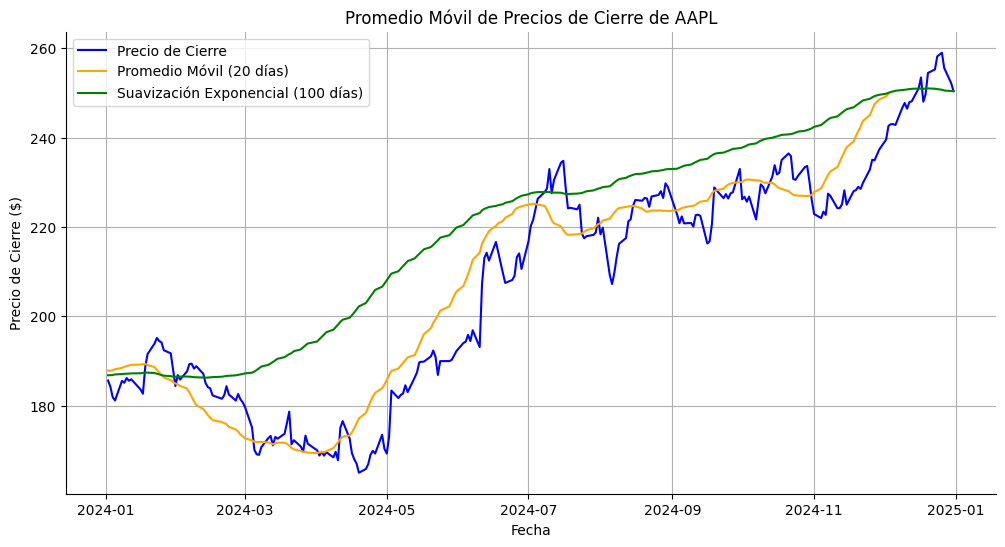

In [ ]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.5018043098507812
p-value: 0.5326185845400777
La tendencia no es estacionaria (aceptamos la hipótesis nula).


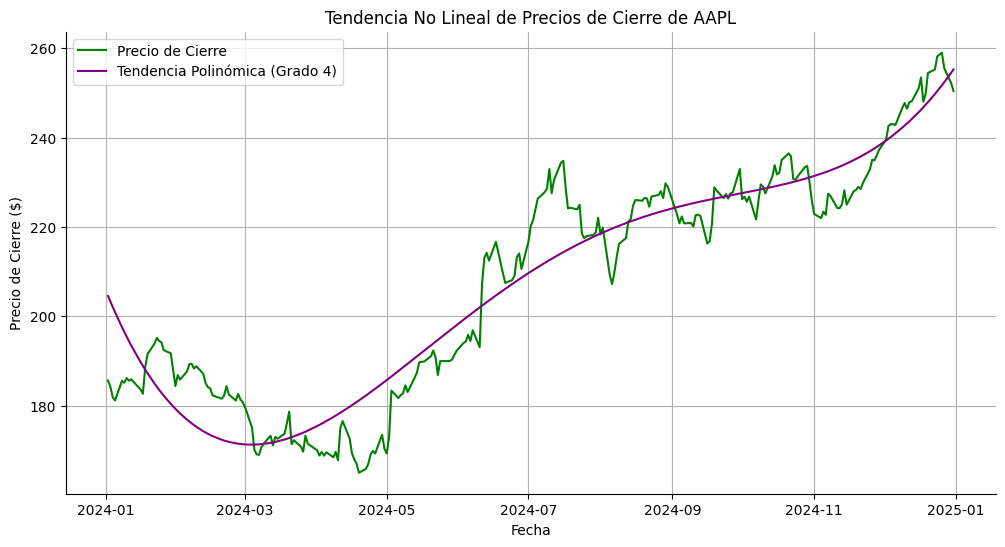

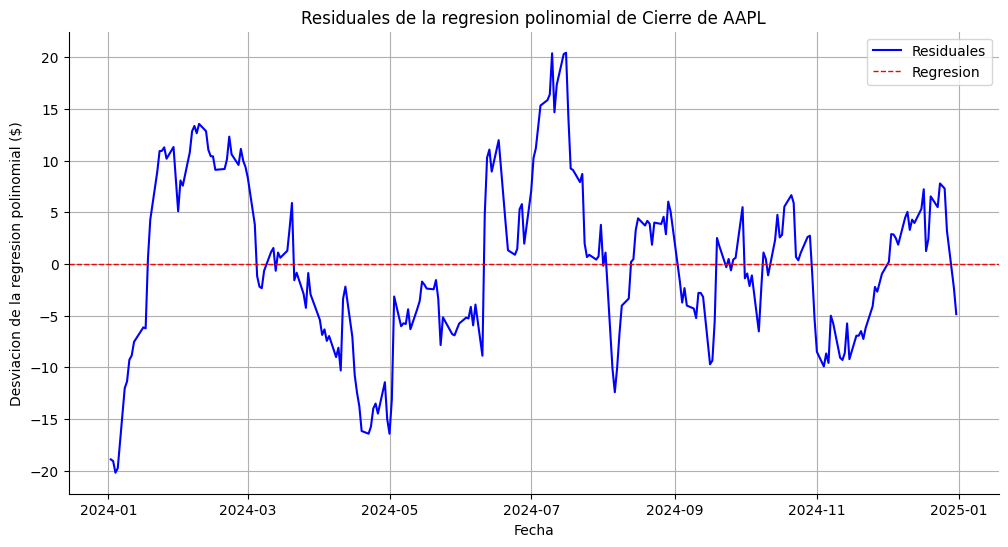

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.5018043098507812
p-value: 0.5326185845400777
La tendencia no es estacionaria (aceptamos la hipótesis nula).


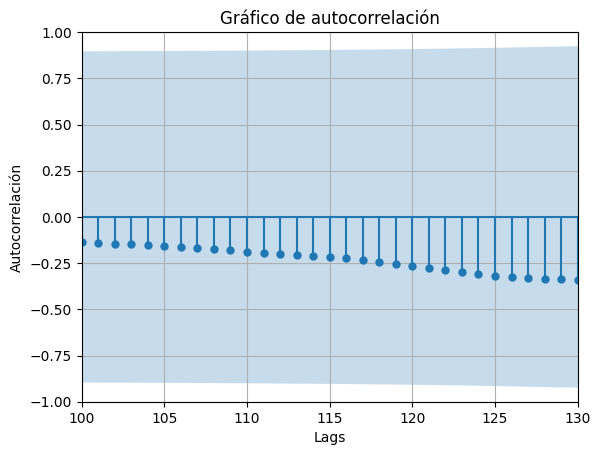

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

##**Prophet**

Prophet es un modelo de pronóstico de series temporales desarrollado por el equipo de investigación de Facebook (Meta), diseñado para manejar datos con tendencias no lineales, estacionalidades múltiples (diarias, semanales, anuales) y eventos externos específicos, como feriados o promociones. Se basa en un enfoque de modelado aditivo, en el que la serie temporal se descompone en componentes interpretables, permitiendo una mayor transparencia del modelo.

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,


In [ ]:
!pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'DBM1JY0NQ5V04OZE'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,
2025-04-01,219.805,223.6800,218.9000,223.19,36412740.0
2025-03-31,217.005,225.6200,216.2300,222.13,65299321.0
2025-03-28,221.670,223.8100,217.6800,217.90,39818617.0
2025-03-27,221.390,224.9900,220.5601,223.85,37094774.0
2025-03-26,223.510,225.0200,220.4700,221.53,34532656.0
...,...,...,...,...,...
2024-01-08,182.085,185.6000,181.5000,185.56,59144470.0
2024-01-05,181.990,182.7600,180.1700,181.18,62196924.0
2024-01-04,182.150,183.0872,180.8800,181.91,71983570.0


In [ ]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/j94j2v5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/aatjfcr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9888', 'data', 'file=/tmp/tmpm9htnr__/j94j2v5b.json', 'init=/tmp/tmpm9htnr__/aatjfcr2.json', 'output', 'file=/tmp/tmpm9htnr__/prophet_modelcvpv53mk/prophet_model-20250512134448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:44:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


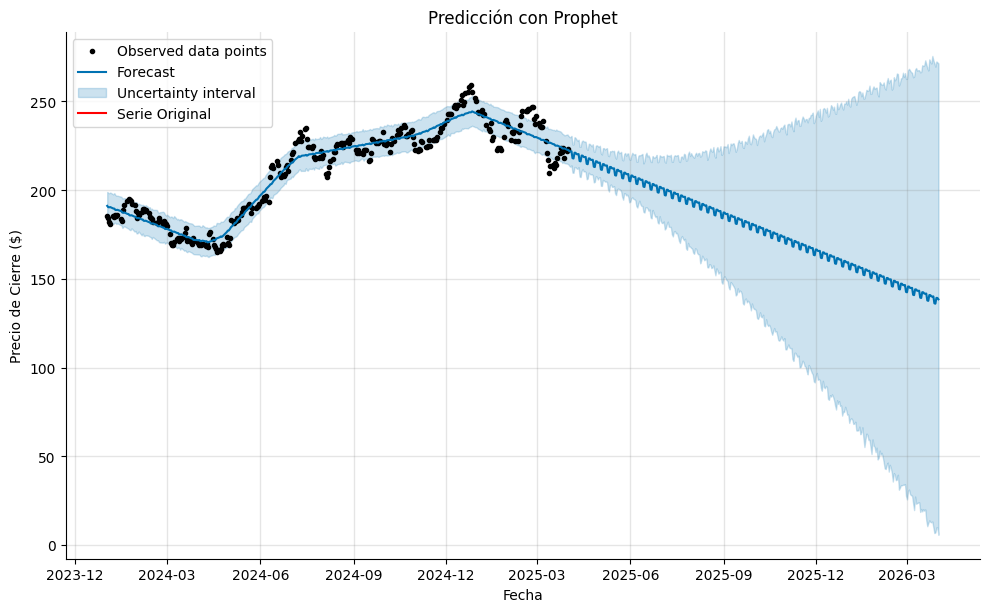

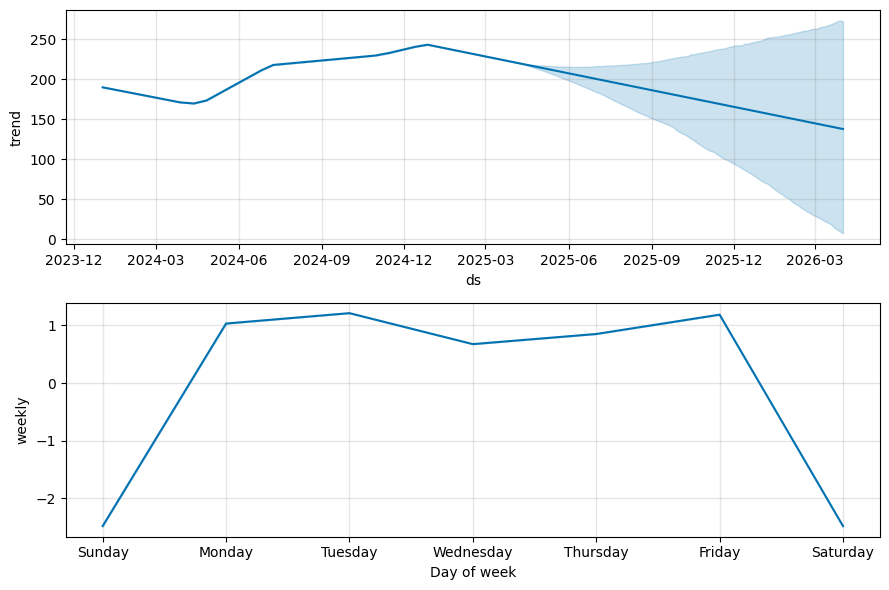

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['AAPL_Close'].reset_index().rename(columns={'date': 'ds', 'AAPL_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AAPL_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/5heic6ad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/p_dc194g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57053', 'data', 'file=/tmp/tmpm9htnr__/5heic6ad.json', 'init=/tmp/tmpm9htnr__/p_dc194g.json', 'output', 'file=/tmp/tmpm9htnr__/prophet_modelr3gxvx8j/prophet_model-20250512134458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


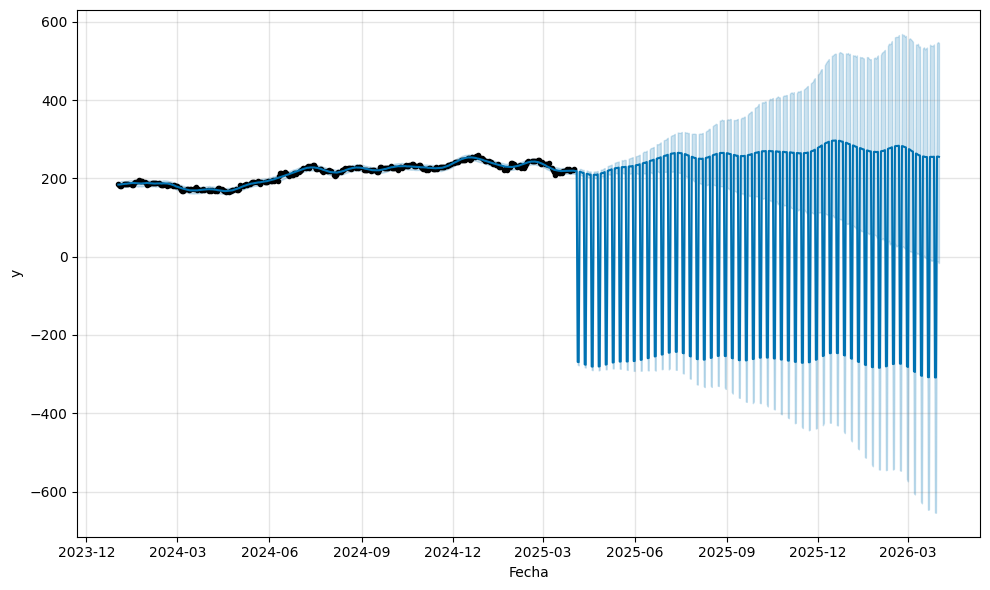

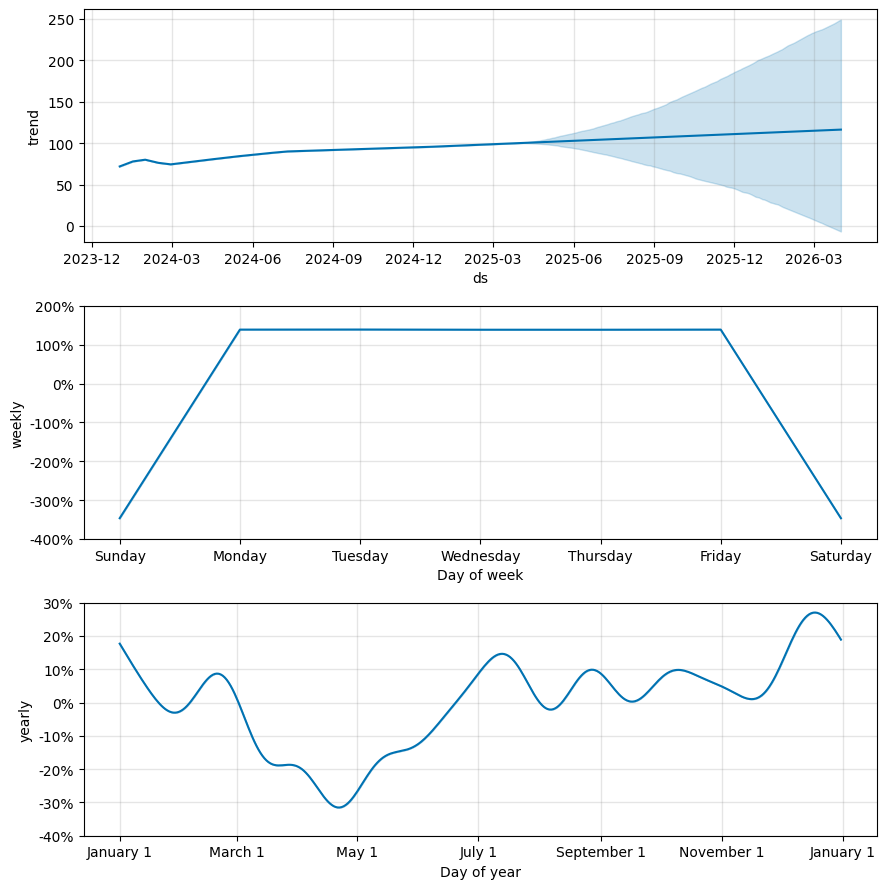

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df.reset_index()[['date', 'AAPL_Close']].rename(columns={'date': 'ds', 'AAPL_Close': 'y'}))


# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AAPL_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)

#**Microsoft (MSFT)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='MSFT',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
Date,,,,,,


In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'DBM1JY0NQ5V04OZE'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de TSLA
ticker = 'MSFT'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-01-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume
date,,,,,
2024-12-31,426.100,426.7300,420.660,421.50,13246509.0
2024-12-30,426.060,427.5500,421.900,424.83,13158703.0
2024-12-27,434.600,435.2200,426.350,430.53,18117713.0
2024-12-26,439.080,440.9400,436.630,438.11,8199927.0
2024-12-24,434.650,439.6000,434.190,439.33,7164543.0
...,...,...,...,...,...
2024-01-08,369.300,375.2000,369.010,374.69,23133967.0
2024-01-05,368.970,372.0600,366.500,367.75,20074451.0
2024-01-04,370.665,373.1000,367.170,367.94,20901502.0


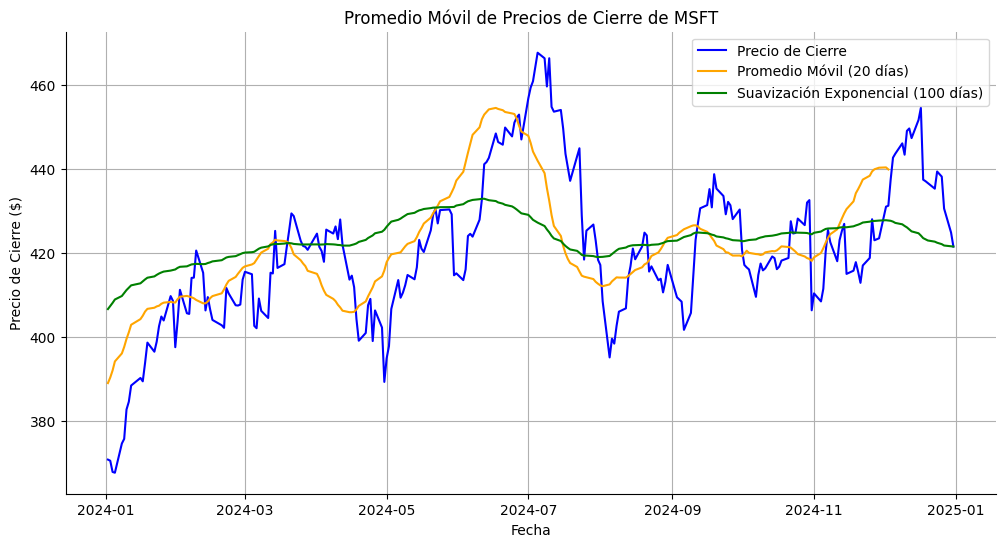

In [ ]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['MSFT_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['MSFT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['MSFT_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['MSFT_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.5594749170949131
p-value: 0.5039120200279891
La tendencia no es estacionaria (aceptamos la hipótesis nula).


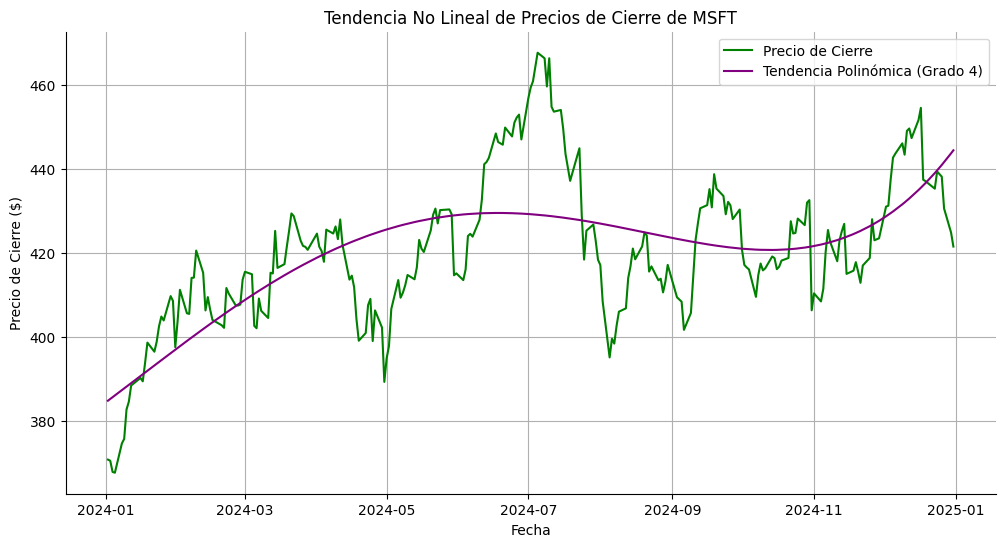

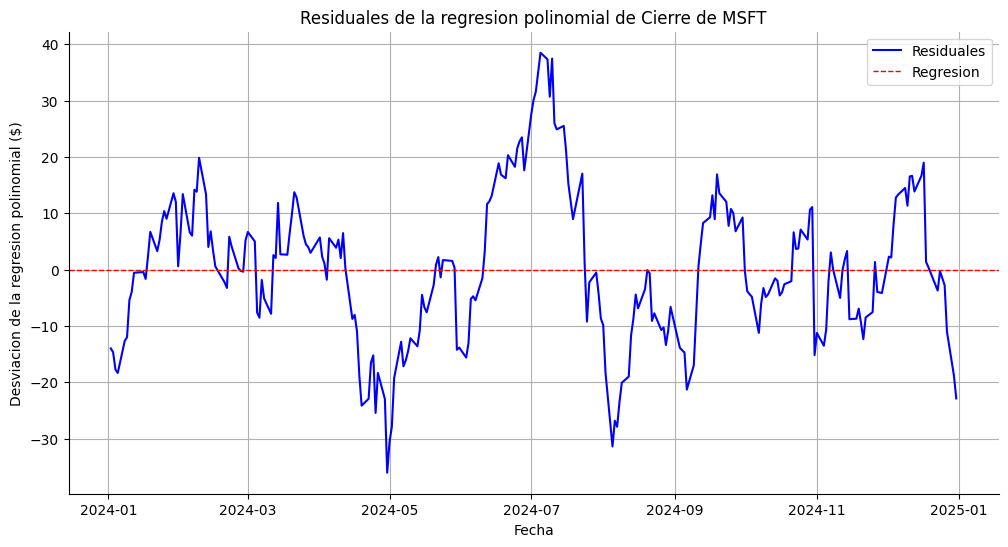

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['MSFT_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de MSFT') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['MSFT_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.5594749170949131
p-value: 0.5039120200279891
La tendencia no es estacionaria (aceptamos la hipótesis nula).


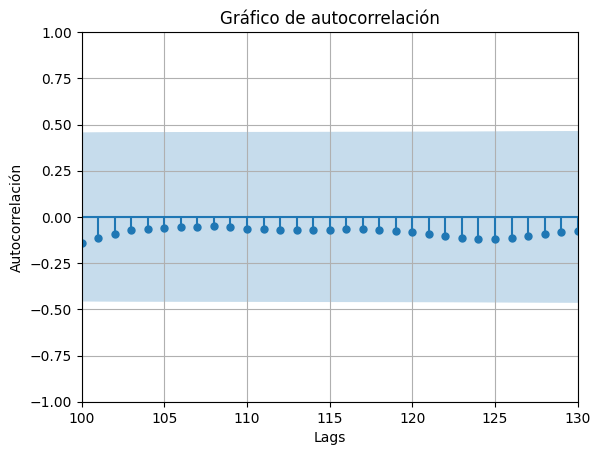

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['MSFT_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

##**Prophet**

Prophet es un modelo de pronóstico de series temporales desarrollado por el equipo de investigación de Facebook (Meta), diseñado para manejar datos con tendencias no lineales, estacionalidades múltiples (diarias, semanales, anuales) y eventos externos específicos, como feriados o promociones. Se basa en un enfoque de modelado aditivo, en el que la serie temporal se descompone en componentes interpretables, permitiendo una mayor transparencia del modelo.

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='MSFT',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
Date,,,,,,


In [ ]:
!pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'DBM1JY0NQ5V04OZE'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'MSFT'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume
date,,,,,
2025-04-01,374.650,382.8500,373.230,382.19,19689503.0
2025-03-31,372.535,377.0700,367.240,375.39,35184676.0
2025-03-28,388.080,389.1300,376.930,378.80,21632016.0
2025-03-27,390.130,392.2400,387.395,390.58,13766761.0
2025-03-26,395.000,395.3100,388.570,389.97,16132906.0
...,...,...,...,...,...
2024-01-08,369.300,375.2000,369.010,374.69,23133967.0
2024-01-05,368.970,372.0600,366.500,367.75,20074451.0
2024-01-04,370.665,373.1000,367.170,367.94,20901502.0


In [ ]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/cksovsuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/i93c7ol6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60444', 'data', 'file=/tmp/tmpm9htnr__/cksovsuu.json', 'init=/tmp/tmpm9htnr__/i93c7ol6.json', 'output', 'file=/tmp/tmpm9htnr__/prophet_model6854i3ro/prophet_model-20250512135029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


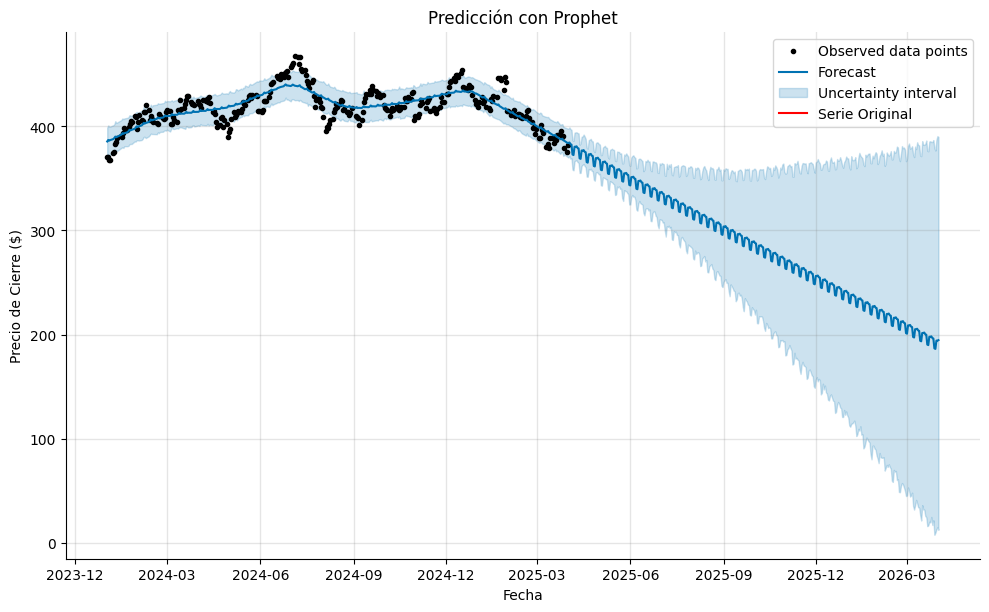

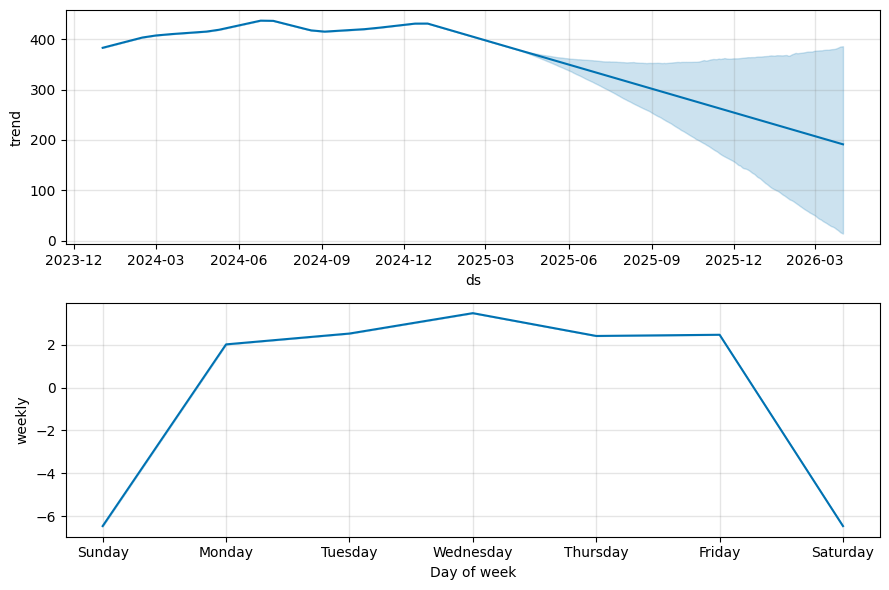

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['MSFT_Close'].reset_index().rename(columns={'date': 'ds', 'MSFT_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['MSFT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/wb_wr7dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9htnr__/096nfuo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37248', 'data', 'file=/tmp/tmpm9htnr__/wb_wr7dp.json', 'init=/tmp/tmpm9htnr__/096nfuo5.json', 'output', 'file=/tmp/tmpm9htnr__/prophet_model6y52z6_3/prophet_model-20250512135147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


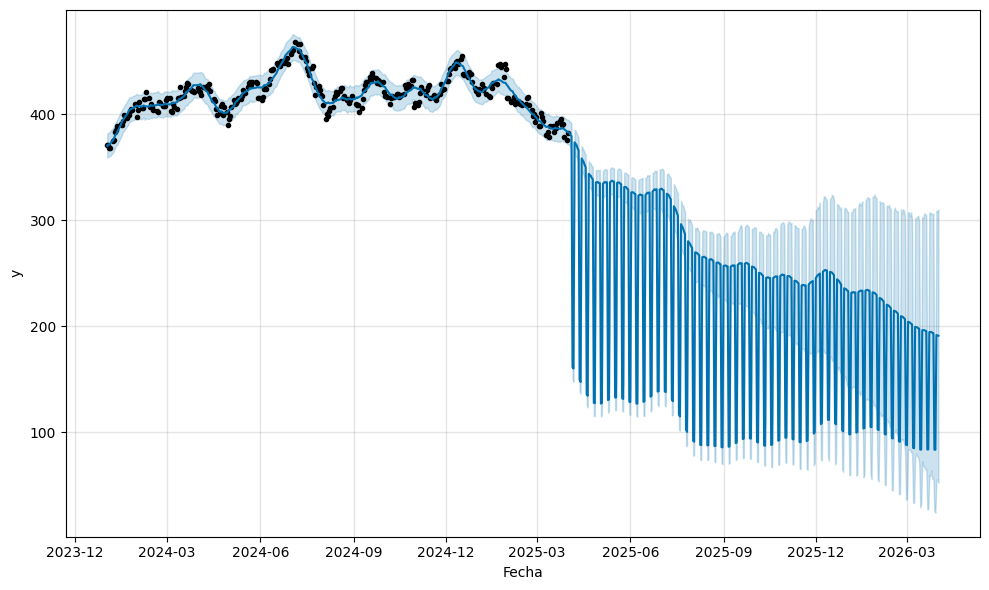

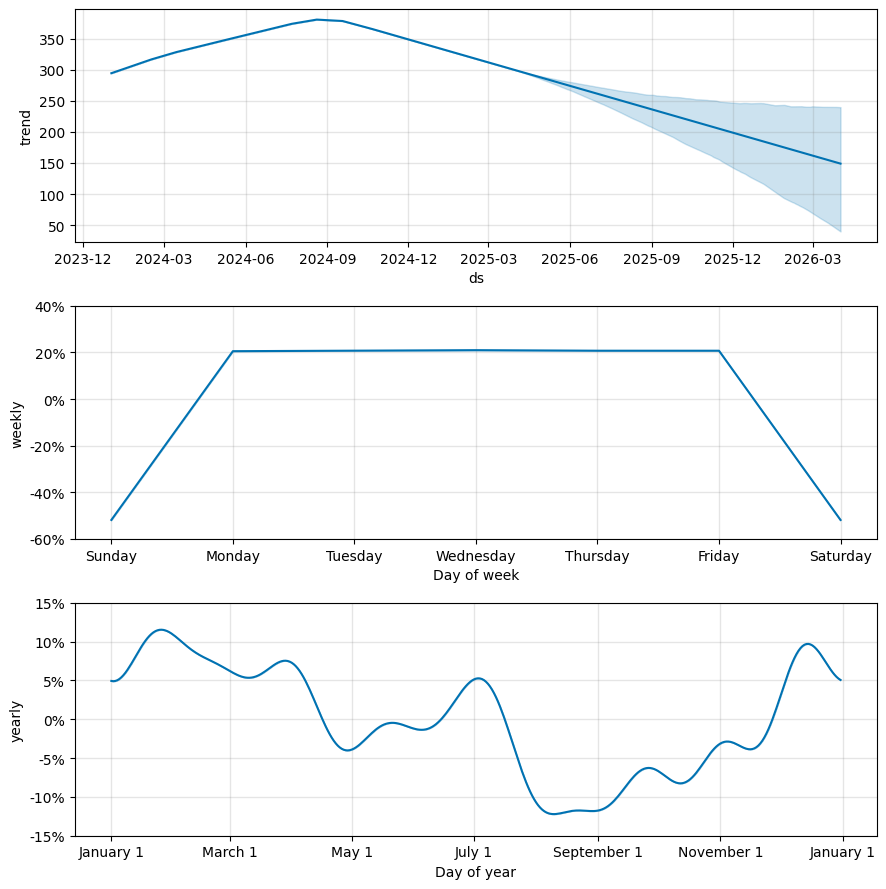

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df.reset_index()[['date', 'MSFT_Close']].rename(columns={'date': 'ds', 'MSFT_Close': 'y'}))


# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['MSFT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)

#**Causalidad de Granger**

El concepto de causalidad de Granger se refiere a una forma de determinar si una serie temporal puede predecir a otra. Formalmente, una variable
𝑋
X "causa en el sentido de Granger" a otra variable
𝑌
Y si los valores pasados de
𝑋
X contienen información que ayuda a predecir los valores futuros de
𝑌
Y, por encima de la información contenida en los valores pasados de
𝑌
Y por sí sola.

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

# API Key
my_key = '8E59X8RXQDK9HQJU'
ts = TimeSeries(key=my_key, output_format='pandas')

# Descargar datos AAPL
data_aapl, _ = ts.get_daily(symbol='AAPL', outputsize='full')
data_aapl.columns = ['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume']
data_aapl = data_aapl.sort_index()
df_aapl = data_aapl.loc['2024-01-01':'2025-04-01']

# Descargar datos MSFT
data_msft, _ = ts.get_daily(symbol='MSFT', outputsize='full')
data_msft.columns = ['MSFT_Open', 'MSFT_High', 'MSFT_Low', 'MSFT_Close', 'MSFT_Volume']
data_msft = data_msft.sort_index()
df_msft = data_msft.loc['2024-01-01':'2025-04-01']

# Unir y limpiar
df = pd.concat([df_aapl['AAPL_Close'], df_msft['MSFT_Close']], axis=1).dropna()

# Prueba de Estacionariedad
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f'--- ADF para {nombre} ---')
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print(f'Valores críticos: {resultado[4]}\n')

prueba_adf(df['AAPL_Close'], 'AAPL')
prueba_adf(df['MSFT_Close'], 'MSFT')

# Diferenciar si no son estacionarias
if adfuller(df['AAPL_Close'])[1] > 0.05:
    df['AAPL_Close'] = df['AAPL_Close'].diff()
if adfuller(df['MSFT_Close'])[1] > 0.05:
    df['MSFT_Close'] = df['MSFT_Close'].diff()

df = df.dropna()

# Prueba de Granger
print("\n--- ¿AAPL causa MSFT? ---")
grangercausalitytests(df[['MSFT_Close', 'AAPL_Close']], maxlag=5, verbose=True)

print("\n--- ¿MSFT causa AAPL? ---")
grangercausalitytests(df[['AAPL_Close', 'MSFT_Close']], maxlag=5, verbose=True)

--- ADF para AAPL ---
Estadístico ADF: -1.3123902884599767
p-valor: 0.6234848498857855
Valores críticos: {'1%': np.float64(-3.4514843502727306), '5%': np.float64(-2.8708485956333556), '10%': np.float64(-2.571729625657462)}

--- ADF para MSFT ---
Estadístico ADF: -2.9445764681575457
p-valor: 0.040404514027947466
Valores críticos: {'1%': np.float64(-3.4514843502727306), '5%': np.float64(-2.8708485956333556), '10%': np.float64(-2.571729625657462)}


--- ¿AAPL causa MSFT? ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0041  , p=0.9491  , df_denom=308, df_num=1
ssr based chi2 test:   chi2=0.0041  , p=0.9488  , df=1
likelihood ratio test: chi2=0.0041  , p=0.9488  , df=1
parameter F test:         F=0.0041  , p=0.9491  , df_denom=308, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2417  , p=0.7855  , df_denom=305, df_num=2
ssr based chi2 test:   chi2=0.4912  , p=0.7822  , df=2
likelihood ratio test: chi2=0.4908  , p=0.7824 

{np.int64(1): ({'ssr_ftest': (np.float64(0.11257983361088203),
    np.float64(0.7374543622882146),
    np.float64(308.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.11367639043176724),
    np.float64(0.7359968202164593),
    np.int64(1)),
   'lrtest': (np.float64(0.11365562005607899),
    np.float64(0.7360200399301458),
    np.int64(1)),
   'params_ftest': (np.float64(0.11257983361090648),
    np.float64(0.7374543622882146),
    np.float64(308.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.06303601434048466),
    np.float64(0.938921887690262),
    np.float64(305.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.12813878324950978),
    np.float64(0.9379399120980714),
    np.int64(2)),
   'lrtest': (np.float64(0.1281123074036259),
    np.float64(0.9379523285565357),
    np.int64(2)),
   'params_ftest': (np.float64(0.06303601434047681),
    np.float64(0.9389218876902938),
    np.float64(305.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],


##**Conclusión**

El análisis de las acciones de Apple (AAPL) y Microsoft (MSFT) durante el año muestra que a pesar de las fluctuaciones y caídas temporales, ambas compañías mantuvieron una tendencia general de crecimiento, especialmente hacia finales de 2024. Sin embargo, los precios de ambas acciones no siguen una tendencia estacionaria, lo que implica que presentan variaciones impredecibles a lo largo del tiempo y no se ajustan a un patrón repetitivo estable.

En el caso de Apple,  se notó que el precio subía, luego tendía a bajar y viceversa, sin embargo, las acciones empezaron a recuperarse de forma más constante desde mayo. Esto muestra que los cambios de precio tienden a corregirse por sí solos en el corto plazo. Por otro lado, las acciones de Microsoft fueron más inestables y cambiaron bruscamente. Además, no hubo una conexión clara entre los precios anteriores y los actuales, lo que hace difícil predecir su comportamiento usando solo datos pasados.

Los modelos de predicción lograron identificar la dirección general del comportamiento de las acciones, sobre todo hacia el final del año. Sin embargo, no fueron buenos para hacer predicciones a largo plazo, es decir, para predecir cómo se comportarán las acciones en el futuro lejano. Esto significa que debido a lo impredecible que es el comportamiento de las acciones, es importante tener cuidado al confiar en esas predicciones, ya que pueden no ser precisas.

Finalmente, la prueba de causalidad de Granger indica que no existe una relación entre las acciones de Apple y Microsoft. Es decir, los precios de una no influyen directamente en los precios de la otra. Esto significa que las fluctuaciones de una acción no ayudan a predecir las de la otra.